Conductor 1 charge density range: 2.753753405600798e-12 1.1919728628540984e-11
Conductor 1 total charge: 3.5498017422166335e-18
Conductor 2 charge density range: -1.794175537278323e-11 -6.470510312258233e-12
Conductor 2 total charge: -6.589958486650214e-18
Conductor 3 charge density range: 5.660631306427567e-12 1.8268444999785343e-11
Conductor 3 total charge: 6.219326090557591e-18


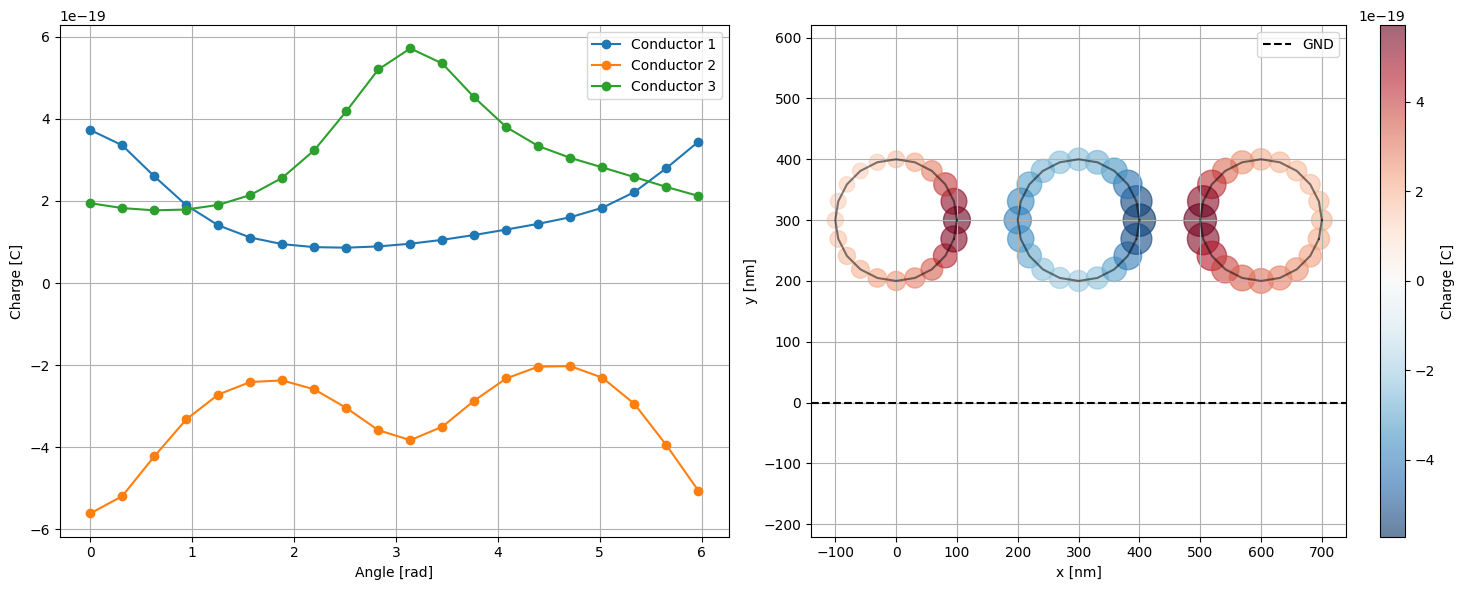

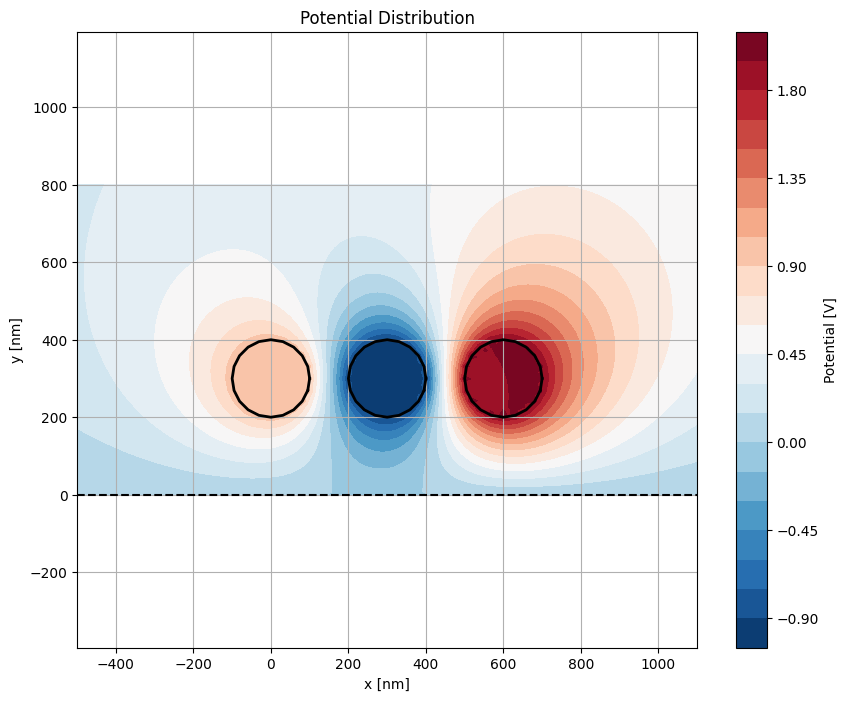

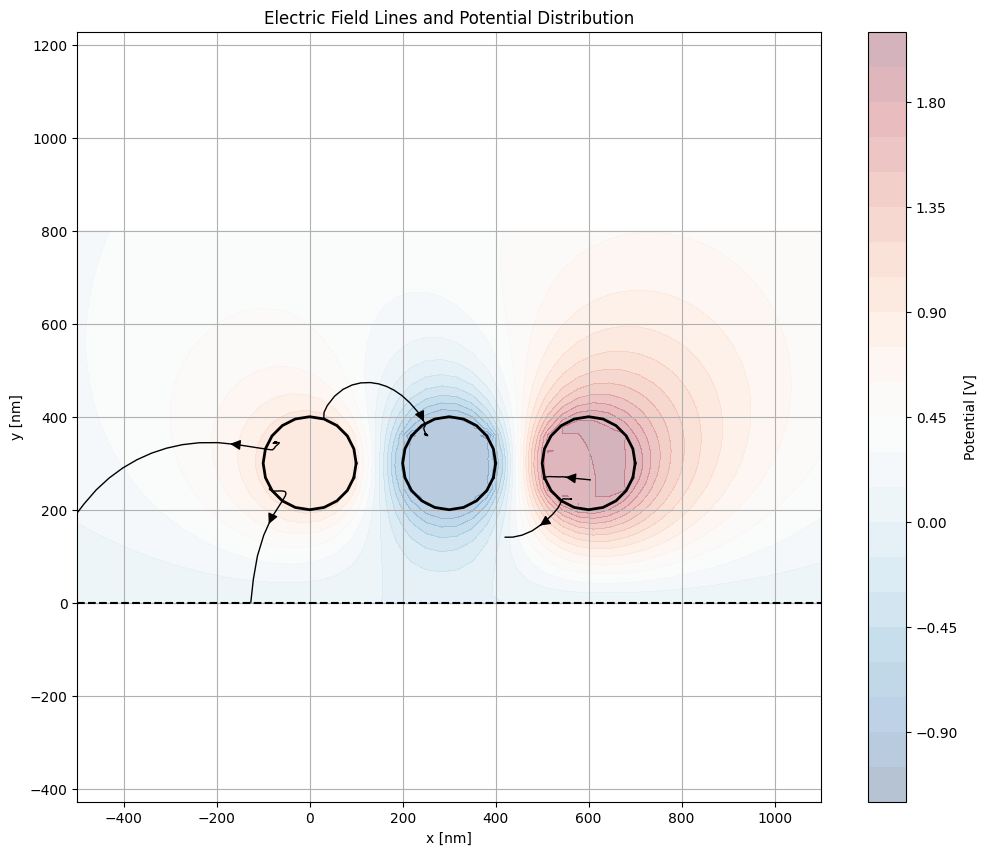


 C Matrix [F/m]:
[[ 8.25984025e-11 -3.63125956e-11 -2.72564510e-12]
 [-3.63125956e-11  1.01692220e-10 -3.63125956e-11]
 [-2.72564510e-12 -3.63125956e-11  8.25984025e-11]]
Capacitance matrix has been saved to ./out/test_circle.csv


In [5]:
import sys
import os
# multiconcalc.pyが存在するディレクトリをパスに追加
sys.path.append(os.path.abspath('..'))

import importlib
import multiconcalc  # まずモジュールをインポート
importlib.reload(multiconcalc)  # クラスを更新した場合更新を反映させるため再読み込み
from multiconcalc import MultiConductorCalculator


def test_circle():
  calculator = MultiConductorCalculator(epsilon_r=2.0)

  radius = 100e-9
  height = 300e-9
  spacing = 3 * radius
  n=20

  calculator.add_conductor(radius=radius, height=height, N_points=n, x_offset=0.0)
  calculator.add_conductor(radius=radius, height=height, N_points=n, x_offset=spacing)
  calculator.add_conductor(radius=radius, height=height, N_points=n, x_offset=spacing*2)

  voltages = [1.0,-1.0, 2.0]
  charge_density = calculator.solve_charge_density(voltages)

  calculator.plot_chage_distribution(charge_density)

  calculator.plot_potential(charge_density)
  
  # 電気力線描画
  calculator.plot_electric_field_lines(charge_density, n_lines=20)

  C = calculator.calculate_capacitance_matrix()
  print("\n C Matrix [F/m]:")
  print(C)

  # ピコファラッド単位で出力
  calculator.export_capacitance_matrix("./out/test_circle.csv", unit_prefix='p')
 
if __name__ == "__main__":
  test_circle()
  